In [1]:
!pip install python-pachyderm


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip


In [2]:
commit_id = "ecb90d3495694a92a2c70ffebb7844d2"

In [3]:
import python_pachyderm as pc
client = pc.Client(host="pachd.pachyderm.svc.cluster.local")


In [4]:
import pandas as pd
wines = client.get_file(("wines", "master", commit_id), "wine.csv")
wines_df = pd.read_csv(wines, delimiter=';')


In [5]:
# Split data into training and test

wine_train = wines_df.sample(frac=0.7)
print(wine_train.shape)

(3429, 12)


In [6]:
wine_test = wines_df.loc[~wines_df.set_index(list(wines_df.columns)).index.isin(wine_train.set_index(list(wine_train.columns)).index)]
print(wine_test.shape)

(1095, 12)


In [7]:
from sklearn.linear_model import LinearRegression
features = ['volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']
wine_ln_reg = LinearRegression()
wine_ln_reg = wine_ln_reg.fit(wine_train[features], wine_train['quality'])

In [8]:
print(wine_ln_reg.coef_)
print(wine_ln_reg.intercept_)

[-2.07802527e+00  2.50969156e-02 -1.26172396e+00  1.83613557e-04
  6.02125314e-01  3.69944253e-01]
2.1394643475352746


In [9]:
wine_ln_pred = wine_ln_reg.predict(wine_test[features])
wine_ln_resid = wine_ln_pred - wine_test['quality']

Text(0.5, 1.0, 'Normal Q-Q Plot')

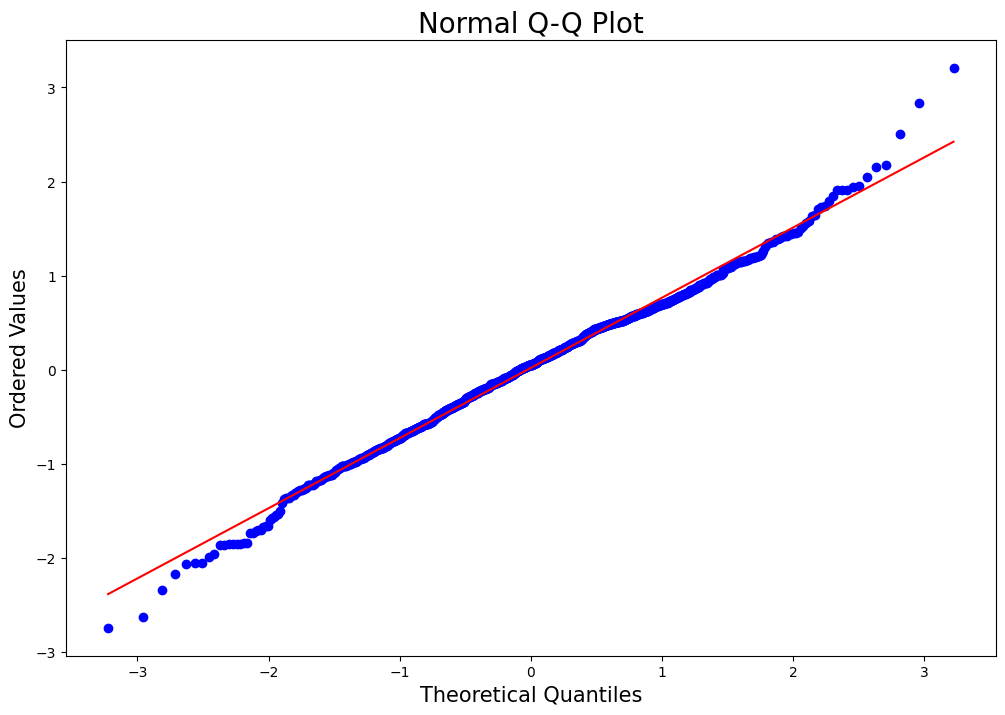

In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# Normal Q-Q plot
stats.probplot(wine_ln_resid, dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles",fontsize=15)
plt.ylabel("Ordered Values",fontsize=15)
plt.title("Normal Q-Q Plot",fontsize=20)